# Exploratory Data Analysis: Covid 19 Countrywise Data


Explore the statewise covid -19 vaccination data through visualization and graphs using pandas , matplotlib and seaborn .Also learn how to handle null values in the data and split it into separate datasets for gender ,state ,etc.Alse one can get idea to handle big data.

This project is part of my Data Analysis with Python: Zero to Pandas course - www.zerotopandas.com.
    
PS - You need to have the CSV file uploaded in the jupyter notebook. Here is the link to the dataset:

https://www.kaggle.com/datasets/imdevskp/corona-virus-report

In [ ]:
!pip install pandas --upgrade
!pip install matplotlib 
!pip install seaborn 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Downloading the Dataset

There are several options for getting the dataset into Jupyter:

   1. Download the CSV manually and upload it via Jupyter's GUI
   2.  Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
   3. Use a helper library, e.g., opendatasets, which contains a collection of curated datasets
    and provides a helper function for direct download.
    


In [8]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

# Importing data

In [19]:
covid_data_raw_df=pd.read_csv('country_wise_latest.csv')

In [20]:
covid_data_raw_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


The dataset has been downloaded and extracted.

In [21]:
covid_data_raw_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


A data frame has been created

## Let us find out number of rows and column in the dataset

In [22]:
covid_data_raw_df.shape

(187, 15)

After a quick glimpse at the dataset ,it looks like a typical country wise  report recorded on different days from january to december 2021 .
we can also see that there are NaN values in various columns.

note-the actual data may differ from this data.

Let us save and upload our work to Jovian before continuing.

In [23]:
project_name = "covid-19-countrywise-data-analysis" # change this (use lowercase letters and hyphens only)

In [24]:
!pip install jovian --upgrade -q

In [25]:
import jovian

In [26]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'

## Data Preparation and Cleaning


Data cleaning and preparation are crucial for analyzing the COVID-19 countrywise data. Errors and inconsistencies in country names and infected counts should be identified and corrected. Missing values should be handled using appropriate imputation techniques. Data transformation, such as standardizing dates, is necessary for easier analysis. Outliers must be identified and treated based on their validity. The dataset's integrity should be validated by cross-referencing with reliable sources and conducting sanity checks. These steps ensure accuracy and consistency in the dataset. Proper data cleaning and preparation lay the foundation for meaningful analysis and insights.

while the survey responses contains various information  , we'll limit our analysis to the following areas :
1. Demographic distribution of the survey respondent .
2. confirmed,deaths,recovered .
3. Active,New deaths , New recovered, New cases.
4. Deaths / 100 Cases ,Recovered / 100 Cases.

In [27]:
covid_data_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

covid_data_raw_df.info() gives every information about the dataframe that has been created , i.e about columns and the values that they store

there are 187 entries and 14 columns to work with for EDA .there are certain columns that contains null values.

In [91]:
covid_data_raw_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [92]:
covid_data_raw_df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

covid_data_raw_df.columns it gives the name of columns that dataframe contains

In [29]:
selected_columns=[#Demographic distribution of the survey respondent 
    'Country/Region',
    #confirmed,deaths,recovered .
    'Confirmed',
    'Deaths' ,
    'Recovered',
    #Active,New deaths , New recovered, New cases.
    'Active',
    'New cases',
    'New deaths',
    'New recovered',
    #Deaths / 100 Cases ,Recovered / 100 Cases
    'Deaths / 100 Cases',
    'Recovered / 100 Cases'
]
    


In [30]:
len(selected_columns)

10

Let's extract a copy of the data from these columns into a data frame covid_data_df, 
which we can continue to modify further without affecting the original data frame.

In [31]:
covid_data_df = covid_data_raw_df[selected_columns].copy()

In [32]:
covid_data_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34
3,Andorra,907,52,803,52,10,0,0,5.73,88.53
4,Angola,950,41,242,667,18,1,0,4.32,25.47
...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84


Most columns have the datatype object , either because they contain values of different types, or they contain empty values.
which are repreented using NaN . It appears that every column contains some empty values ,since the non-Null count for every column 
is lower than the total count. we need to deal with empty values and manually adjust the datatype for each column on a case-by-case.



In [33]:
covid_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country/Region         187 non-null    object 
 1   Confirmed              187 non-null    int64  
 2   Deaths                 187 non-null    int64  
 3   Recovered              187 non-null    int64  
 4   Active                 187 non-null    int64  
 5   New cases              187 non-null    int64  
 6   New deaths             187 non-null    int64  
 7   New recovered          187 non-null    int64  
 8   Deaths / 100 Cases     187 non-null    float64
 9   Recovered / 100 Cases  187 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 14.7+ KB


In [34]:
covid_data_df['Country/Region'].value_counts()

Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Country/Region, Length: 187, dtype: int64

To start with the basic of data cleaning , Lets find out if any of the columns have any null or missing values.

In [35]:
overall_data=covid_data_df.isna().sum()
overall_data

Country/Region           0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
New cases                0
New deaths               0
New recovered            0
Deaths / 100 Cases       0
Recovered / 100 Cases    0
dtype: int64

## Now we find that if there is any repeated data present or not.

In [36]:
covid_data_df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [37]:
covid_data_df.sample(15)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases
21,Bosnia and Herzegovina,10498,294,4930,5274,731,14,375,2.80,46.96
24,Brunei,141,3,138,0,0,0,0,2.13,97.87
53,El Salvador,15035,408,7778,6849,405,8,130,2.71,51.73
67,Greece,4227,202,1374,2651,34,0,0,4.78,32.51
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64
101,Lithuania,2019,80,1620,319,11,0,4,3.96,80.24
118,Namibia,1843,8,101,1734,68,0,26,0.43,5.48
25,Bulgaria,10621,347,5585,4689,194,7,230,3.27,52.58
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04
46,Czechia,15516,373,11428,3715,192,2,0,2.40,73.65


  the dataframe has many number of rows , to analyise or see the trend  we use covid_data_df.sample(15) ,it returns sample to analysie.

In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'

## Exploratory Analysis and Visualization

EDA (Exploratory Data Analysis) for countrywise COVID-19  data involves inspecting the dataset, calculating summary statistics, and visualizing the distribution of virus in different global zones.Also it shows the trend of active cases , recovery ,deaths ,etc. It helps identify trends, imbalances, and outliers in death rates. Cross-tabulation analysis reveals zone-specific patterns within age groups. Geospatial analysis examines virus-spread distribution across countries. Hypothesis testing can validate specific research questions. EDA provides insights for public health policies and interventions.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Let us find out the total number of death ,active cases , recovered people along the globe


In [40]:
total_deaths=covid_data_df.Deaths.sum()
total_active_cases= covid_data_df.Active.sum()
total_recovery=covid_data_df.Recovered.sum()

In [41]:
print('total_deaths:',total_deaths)
print('total_active_cases:',total_active_cases)
print('total_recovery:',total_recovery)


total_deaths: 654036
total_active_cases: 6358362
total_recovery: 9468087


### This above analysis potrays a hardbreaking pandemic situation throughout the world , where 654036 people have lost their lives , and more than 6 million poeple are in serious condition.

## Now let us analysie the top most countries who faced this severe condition

In [54]:
covid_data_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_data_df.rename(columns={'Deaths / 100 Cases': 'Deathsrate'}, inplace=True)
covid_data_df.rename(columns={'Recovered / 100 Cases': 'Recoveredrate'}, inplace=True)
top_countries=covid_data_df.sort_values('Deaths',ascending=False).head(15)
top_countries=top_countries[['Country','Deaths']]
top_countries

,Country,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


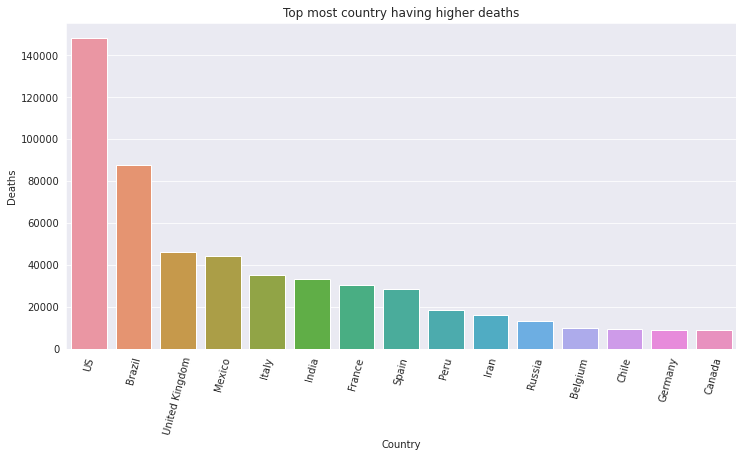

In [49]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top most country having higher deaths')
sns.barplot(top_countries.Country,top_countries.Deaths);

It appears that a disproportionately high number of deaths happened in USA and Brazil than other countries.

## Countries with high active cases. 
- Explore the countries which have high number of active cases.

In [50]:
top_active_cases=covid_data_df.sort_values('Active',ascending=False).head(15)
top_active_cases=top_active_cases[['Country','Active']]
top_active_cases

,Country,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


As we see here , US and Brazil has comparitively higher number of active cases than other countries

 - ##  let us visualize through the line graph with matplotlib library

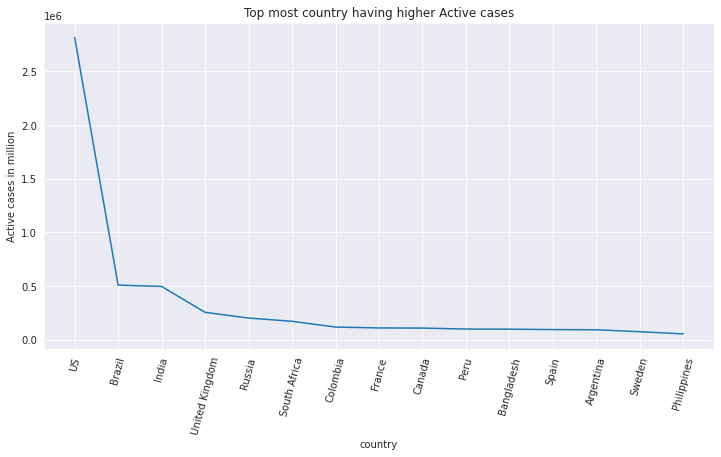

In [51]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top most country having higher Active cases')
plt.plot(top_active_cases.Country,top_active_cases.Active)
plt.xlabel('country')
plt.ylabel('Active cases in million');


we clearly see that the country with higher active cases has higher death rates

## Now we analyse the death/100 cases vs recovery/100 cases

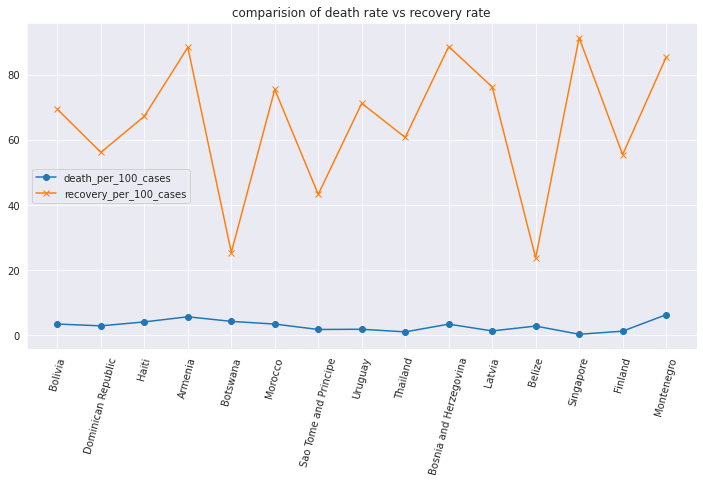

In [57]:
plt.figure(figsize=(12,6))
country=covid_data_df.Country.sample(15)
plt.xticks(rotation=75)
death_per_100_cases=covid_data_df.Deathsrate.head(15)
recovery_per_100_cases=covid_data_df.Recoveredrate.head(15)
plt.plot(country,death_per_100_cases,marker='o')
plt.plot(country,recovery_per_100_cases,marker='x')
plt.legend(['death_per_100_cases','recovery_per_100_cases'])
plt.title('comparision of death rate vs recovery rate');

Here , it shows the comparison between the death rate and recovery rate of various random countries.

# Let us Explore the trend in the new cases from all over the world

In [63]:
count_df = covid_data_df.groupby('Country')[['New cases']].sum().sample(50)
count_df

,New cases
Country,
Madagascar,395
Togo,6
Cote d'Ivoire,59
Yemen,10
Denmark,109
Estonia,0
Equatorial Guinea,0
Burkina Faso,14
Gabon,205


here it gives the data of active cases of sample countries

 #### Let us use seaborn to visualise the trend in the new actives cases all over the world using heatmap.

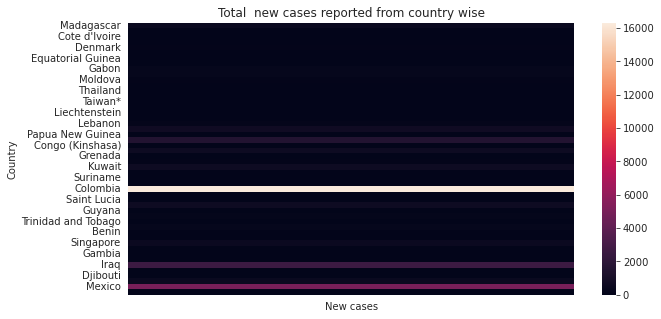

In [64]:
plt.figure(figsize=(10,5))
plt.title("Total  new cases reported from country wise")
sns.heatmap(count_df);

Let us save and upload our work to Jovian before continuing

In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'

## Asking and Answering Questions

As part of this data analysis, it is very crucial to raise question and find answer to them. Here we will try to find out some of the most essential questions, that will help us in drawing a major conclusion from our dataset.

We have already gained several insights about the trend and death rate in general,simply by exploring individual columns in the dataset
Let's ask some specific questions ,and try to answer them using dataframe operations and interesting visualisation

# Q1: Create a data frame of the country  that has highest number of death occured?

To answer this question we use Deaths column.

In [67]:
highest_death_country=covid_data_df.sort_values('Deaths',ascending=False).head(10)
highest_death_country

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86
157,Spain,272421,28432,150376,93613,0,0,0,10.44,55.20
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90


what percent of death happened there

In [76]:
highest_death_country['death_percent']=((highest_death_country.Deaths/covid_data_df.Deaths.sum())*100)
highest_death_country[['Country','death_percent']]

,Country,death_percent
173,US,22.630406
23,Brazil,13.396510
177,United Kingdom,7.009400
111,Mexico,6.730822
85,Italy,5.368512
79,India,5.107976
61,France,4.619318
157,Spain,4.347161
132,Peru,2.816053
81,Iran,2.432894


Let us visualise through the barplot.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


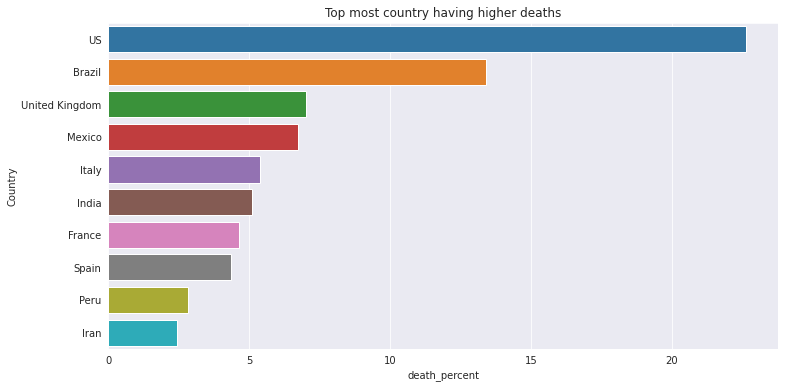

In [78]:
plt.figure(figsize=(12,6))

plt.title('Top most country having higher deaths')
sns.barplot(highest_death_country.death_percent,highest_death_country.Country);

Here it is visible that US has the highest date percent followed by Brazil ,India, etc

# Q2:  Create a dataframe containing 10 highest active rates country?

In [79]:
max_active_cases=covid_data_df.sort_values('Active',ascending=False).head(10)
max_active_cases

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02
61,France,220352,30212,81212,108928,2551,17,267,13.71,36.86
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93


Let us visualise this through scatterplot

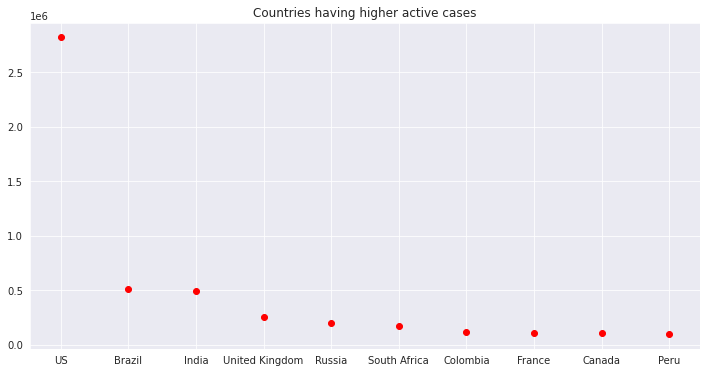

In [80]:
plt.figure(figsize=(12,6))
plt.plot(max_active_cases.Country,max_active_cases.Active,'or')
plt.title('Countries having higher active cases');

## We see from the analysis, the top countries that reported the maximum number of cases cases,  in which they occured.

As we see that the US has the highest number of active cases followed by the Brazil , India , UK etc.

# Q3: create a dataframe which has the list of countries which has highest recovered people

In [155]:
max_recovered_country=covid_data_df.sort_values('Recovered',ascending=False).head(10)
max_recovered_country

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90
128,Pakistan,274289,5842,241026,27421,1176,20,3592,2.13,87.87


A pie chart would be a good way to visualise the distribution.

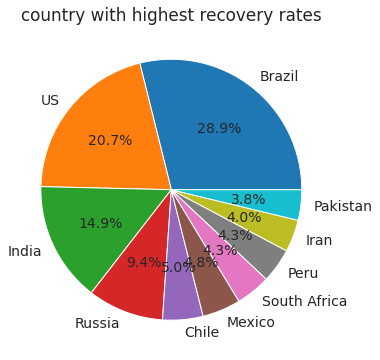

In [157]:
plt.figure(figsize=(12,6))
plt.title('country with highest recovery rates')
plt.pie(max_recovered_country.Recovered, labels=max_recovered_country.Country  , autopct = '%1.1f%%');

# Q4: create a dataframe which has the list of countries which has lowest cases observed

In [160]:
lowest_cases_country=covid_data_df.sort_values('Confirmed',ascending=False).tail(10)
lowest_cases_country

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
59,Fiji,27,0,18,9,0,0,0,0.0,66.67
141,Saint Lucia,24,0,22,2,0,0,0,0.0,91.67
168,Timor-Leste,24,0,0,24,0,0,0,0.0,0.00
69,Grenada,23,0,23,0,0,0,0,0.0,100.00
94,Laos,20,0,19,1,0,0,0,0.0,95.00
49,Dominica,18,0,18,0,0,0,0,0.0,100.00
140,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.0,88.24
68,Greenland,14,0,13,1,1,0,0,0.0,92.86
75,Holy See,12,0,12,0,0,0,0,0.0,100.00
183,Western Sahara,10,1,8,1,0,0,0,10.0,80.00


Let us visualise the least covid deceted countries using barplot.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


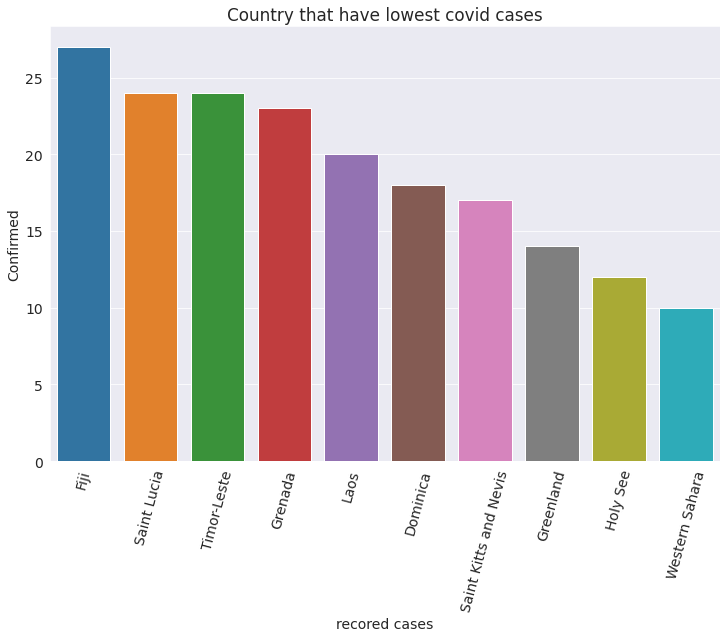

In [168]:
plt.figure(figsize=(12,8))
sns.barplot(lowest_cases_country.Country,lowest_cases_country.Confirmed)
plt.xticks(rotation=75)
plt.title('Country that have lowest covid cases')
plt.xlabel('recored cases');

# Q5: Create a dataframe which shows the countries with highest recovery rate and  lowest recovery rate.

### countries with highest recovery rate

In [82]:
highest_recovered_country=covid_data_df.sort_values('Recoveredrate',ascending=False).head(15)
highest_recovered_country

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
75,Holy See,12,0,12,0,0,0,0,0.00,100.00
69,Grenada,23,0,23,0,0,0,0,0.00,100.00
49,Dominica,18,0,18,0,0,0,0,0.00,100.00
48,Djibouti,5059,58,4977,24,9,0,11,1.15,98.38
78,Iceland,1854,10,1823,21,7,0,0,0.54,98.33
24,Brunei,141,3,138,0,0,0,0,2.13,97.87
121,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24
136,Qatar,109597,165,106328,3104,292,0,304,0.15,97.02
105,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60
110,Mauritius,344,10,332,2,0,0,0,2.91,96.51


Let us visualise through bar graph

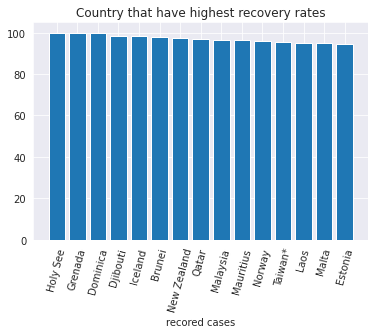

In [87]:
plt.title('countries with highest recovery rate')
plt.bar(highest_recovered_country.Country,highest_recovered_country.Recoveredrate)
plt.xticks(rotation=75)
plt.title('Country that have highest recovery rates')
plt.xlabel('recored cases');

In [88]:
lowest_recovered_country=covid_data_df.sort_values('Recoveredrate',ascending=False).tail(15)
lowest_recovered_country

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deathsrate,Recoveredrate
99,Libya,2827,64,577,2186,158,4,24,2.26,20.41
63,Gambia,326,8,66,252,49,2,6,2.45,20.25
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04
130,Papua New Guinea,62,0,11,51,0,0,0,0.00,17.74
76,Honduras,39741,1166,5039,33536,465,50,117,2.93,12.68
22,Botswana,739,2,63,674,53,1,11,0.27,8.53
118,Namibia,1843,8,101,1734,68,0,26,0.43,5.48
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48
120,Netherlands,53413,6160,189,47064,419,1,0,11.53,0.35
161,Sweden,79395,5700,0,73695,398,3,0,7.18,0.00


Let us visualise through bar graph

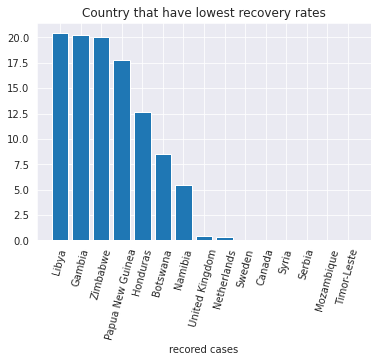

In [89]:
plt.title('countries with lowest recovery rate')
plt.bar(lowest_recovered_country.Country,lowest_recovered_country.Recoveredrate)
plt.xticks(rotation=75)
plt.title('Country that have lowest recovery rates')
plt.xlabel('recored cases');

As we can see the overall recovery rate of the countries having highest as well as lowest values.

Let us save and upload our work to Jovian before continuing.

In [90]:
import jovian

In [91]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'

## Inferences and Conclusion

## The main aim of the project was to analyse the situation of covid-19 virus all over the world.
## We also did a deep analysis through charts and by raising important questions. Let us go through some of the important analysis, we have done through this project -

 - Project goal: Analyze global COVID-19 situation
 - Methodology: Charts and critical analysis
 - Key aspects examined:
    - Spread of the virus
    - Epidemiological trends
    - Impact on healthcare systems
    - Demographic analysis
    - Public health measures
    - Global disparities
 - Objectives:
    -  Understand virus progression patterns and variations
    -  Assess strain on healthcare systems
    -  Identify high-risk populations
    -  Evaluate effectiveness of public health measures
    -  Address global health disparities
 - Contributions:
   - Raise important questions
   - Conduct in-depth analyses
   - Inform effective public health strategies and policies

In [92]:
import jovian

In [93]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'

## References and Future Work

 - All of my doubts has been clared at https://stackoverflow.com
    
 - For knowing more about pandas and it's functions in deatil - https://pandas.pydata.org

 - For more ideas on Matplotlib and it's library- https://matplotlib.org

 - Also for many coding related doubts, refferd to - https://www.w3schools.com
    
## Future work
 - I want to work more on the topic of covid-19 effects and covid-19 vaccination.
 - Also would do the analysis on same type of datset, but that will not be of whole world rather it would be of India.!



In [94]:
import jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "22f3002198/covid-19-countrywise-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/22f3002198/covid-19-countrywise-data-analysis


'https://jovian.com/22f3002198/covid-19-countrywise-data-analysis'